In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-09-22 08:58:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  53.5MB/s    in 2.7s    

2020-09-22 08:58:07 (53.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import os
import zipfile

zip_ref = zipfile.ZipFile('/tmp/horse-or-human.zip', 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [4]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse17-5.png', 'horse04-4.png', 'horse06-5.png', 'horse12-5.png', 'horse15-1.png', 'horse34-6.png', 'horse30-4.png', 'horse31-3.png', 'horse13-0.png', 'horse30-6.png']
['human06-04.png', 'human15-20.png', 'human04-15.png', 'human01-13.png', 'human09-25.png', 'human16-27.png', 'human15-27.png', 'human12-04.png', 'human08-03.png', 'human17-24.png']


In [6]:
print('Total Horse Images',len(train_horse_names))
print('Total Human Images',len(train_human_names))

Total Horse Images 500
Total Human Images 527


In [10]:
print('/tmp/horse-or-human/horses/'+str(train_horse_names[0]))

/tmp/horse-or-human/horses/horse17-5.png


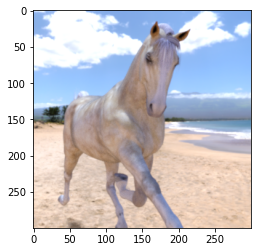

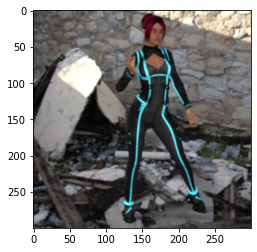

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
sample_image = 10
img_horse = mpimg.imread('/tmp/horse-or-human/horses/'+str(train_horse_names[sample_image]))
img_human = mpimg.imread('/tmp/horse-or-human/humans/'+str(train_human_names[sample_image]))
plt.imshow(img_horse)
plt.figure()
plt.imshow(img_human)
plt.show()

In [20]:
import tensorflow as tf

In [23]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)        3

In [26]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 5s 630ms/step - loss: 1.1641 - accuracy: 0.5072
Epoch 2/15
8/8 [==============================] - 6s 714ms/step - loss: 0.6457 - accuracy: 0.5373
Epoch 3/15
8/8 [==============================] - 6s 812ms/step - loss: 0.4706 - accuracy: 0.7853
Epoch 4/15
8/8 [==============================] - 6s 808ms/step - loss: 0.2703 - accuracy: 0.9053
Epoch 5/15
8/8 [==============================] - 6s 720ms/step - loss: 0.7141 - accuracy: 0.8087
Epoch 6/15
8/8 [==============================] - 6s 714ms/step - loss: 0.1771 - accuracy: 0.9255
Epoch 7/15
8/8 [==============================] - 6s 689ms/step - loss: 0.3485 - accuracy: 0.8821
Epoch 8/15
8/8 [==============================] - 6s 689ms/step - loss: 0.1736 - accuracy: 0.9344
Epoch 9/15
8/8 [==============================] - 6s 710ms/step - loss: 0.1707 - accuracy: 0.9410
Epoch 10/15
8/8 [==============================] - 6s 710ms/step - loss: 0.1169 - accuracy: 0.9644
Epoch 11/15
8/8 [==

Saving vscogirl1000x700.jpg to vscogirl1000x700.jpg
[1.]
vscogirl1000x700.jpg is a human


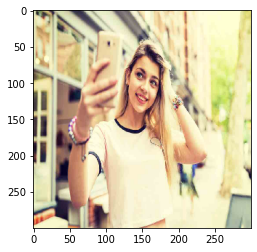

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 